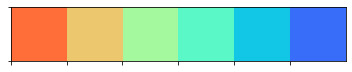

In [1]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import auc as calculate_auc
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import seaborn as sns

from aggmap import AggMap, AggModel

np.random.seed(888) #just for reaptable results


color = sns.color_palette("rainbow_r", 6) #PiYG
sns.palplot(color)

In [2]:
data = load_breast_cancer()
dfx = pd.DataFrame(data.data, columns= data.feature_names)
y = pd.Series(data.target).map({0:'malignant', 1:'benign'})
dfy = pd.get_dummies(y)

In [3]:
X = dfx.values.astype(float)
Y = dfy.values.astype(float)

mp = AggMap(dfx, metric = 'correlation')

2020-08-18 14:10:27,310 - INFO - [bidd-aggmap] - Calculating distance ...
2020-08-18 14:10:27,314 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 30/30 [00:00<00:00, 972.92it/s]


In [4]:
n_splits = 5 #5-fold reapeat 5 times
run_all = []

for repeat_seed in  [8, 16, 32, 64, 128]: #5 repeats random seeds 
    
    outer = KFold(n_splits = n_splits, shuffle = True, random_state = repeat_seed)
    outer_idx = list(outer.split(range(len(Y))))
    
    for c in [1, 3, 5]: 
        
        mp = mp.fit(cluster_channels = c, verbose = 0)
            
        for i, idx in enumerate(outer_idx):
            
            train_idx, valid_idx = idx
            fold_num = "fold_%s" % str(i+1).zfill(2) 
            
            validY = Y[valid_idx]
            validx = X[valid_idx]

            trainx = X[train_idx]
            trainY = Y[train_idx]

            trainX = mp.batch_transform(trainx, scale_method = 'standard')
            validX = mp.batch_transform(validx, scale_method = 'standard')
            print("\n input train and test X shape is %s, %s " % (trainX.shape,  validX.shape))
            clf = AggModel.MultiClassEstimator(epochs = 200,  verbose = 0)
            clf.fit(trainX, trainY, X_valid = validX, y_valid = validY)

            history = clf.history.history
            history['fold'] = fold_num
            history['c'] = c
            history['repeat_seed'] = repeat_seed
            
            run_all.append(history)

2020-08-18 14:10:29,080 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-18 14:10:33,613 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-18 14:10:33,624 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1695.52it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1732.80it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1461.41it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1523.24it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 113/113 [00:00<00:00, 1257.08it/s]



 input train and test X shape is (456, 6, 5, 1), (113, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-18 14:14:00,493 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-18 14:14:00,628 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-18 14:14:00,644 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1340.10it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 933.72it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1463.05it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 2267.18it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 113/113 [00:00<00:00, 831.83it/s]



 input train and test X shape is (456, 6, 5, 3), (113, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-18 14:17:39,832 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-18 14:17:39,953 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-18 14:17:39,970 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1343.00it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1211.82it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1544.13it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1265.78it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 113/113 [00:00<00:00, 1183.28it/s]



 input train and test X shape is (456, 6, 5, 5), (113, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-18 14:21:44,592 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-18 14:21:44,770 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-18 14:21:44,783 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1143.43it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1231.34it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1187.38it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1300.22it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 113/113 [00:00<00:00, 2138.81it/s]



 input train and test X shape is (456, 6, 5, 1), (113, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-18 14:24:59,171 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-18 14:24:59,284 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-18 14:24:59,297 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1829.78it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 2731.24it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1323.98it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1921.06it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 113/113 [00:00<00:00, 2209.99it/s]



 input train and test X shape is (456, 6, 5, 3), (113, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-18 14:27:37,387 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-18 14:27:37,498 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-18 14:27:37,513 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 2007.86it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 2033.71it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1491.58it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1644.71it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 113/113 [00:00<00:00, 1794.13it/s]



 input train and test X shape is (456, 6, 5, 5), (113, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-18 14:30:26,169 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-18 14:30:26,278 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-18 14:30:26,289 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 2277.05it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1698.64it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1635.18it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1588.65it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 113/113 [00:00<00:00, 1802.43it/s]



 input train and test X shape is (456, 6, 5, 1), (113, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-18 14:32:55,905 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-18 14:32:56,022 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-18 14:32:56,034 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1686.36it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1601.87it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 997.38it/s] 



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1353.65it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 113/113 [00:00<00:00, 1146.66it/s]



 input train and test X shape is (456, 6, 5, 3), (113, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-18 14:36:48,085 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-18 14:36:48,236 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-18 14:36:48,295 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1301.60it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1079.44it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1332.36it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 505.12it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 113/113 [00:00<00:00, 1738.19it/s]



 input train and test X shape is (456, 6, 5, 5), (113, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-18 14:41:39,507 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-18 14:41:39,620 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-18 14:41:39,631 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 908.91it/s] 



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1829.67it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1275.91it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 638.97it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 113/113 [00:00<00:00, 1296.92it/s]



 input train and test X shape is (456, 6, 5, 1), (113, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-18 14:45:32,499 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-18 14:45:32,619 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-18 14:45:32,632 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1263.41it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 774.40it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 620.78it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 397.58it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 113/113 [00:00<00:00, 519.54it/s]



 input train and test X shape is (456, 6, 5, 3), (113, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-18 14:50:03,391 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-18 14:50:03,539 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-18 14:50:03,555 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 813.01it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 976.17it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1270.04it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 636.83it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 113/113 [00:00<00:00, 601.07it/s]



 input train and test X shape is (456, 6, 5, 5), (113, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-18 14:54:58,183 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-18 14:54:58,357 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-18 14:54:58,386 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 934.31it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1424.97it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1289.71it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1034.58it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 113/113 [00:00<00:00, 320.57it/s]



 input train and test X shape is (456, 6, 5, 1), (113, 6, 5, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-18 14:58:47,062 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-18 14:58:47,195 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-18 14:58:47,222 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 880.24it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 765.28it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1547.17it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 649.56it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 113/113 [00:00<00:00, 2183.07it/s]



 input train and test X shape is (456, 6, 5, 3), (113, 6, 5, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-18 15:02:56,144 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-18 15:02:56,268 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-18 15:02:56,297 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1394.91it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1564.15it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1160.61it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 114/114 [00:00<00:00, 1065.06it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 113/113 [00:00<00:00, 975.47it/s] 



 input train and test X shape is (456, 6, 5, 5), (113, 6, 5, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


In [5]:
dfr = pd.DataFrame(run_all)
dfr.to_csv('./5FCV_valid.csv')

In [6]:
sns.set(style = 'white', font_scale=1.2)

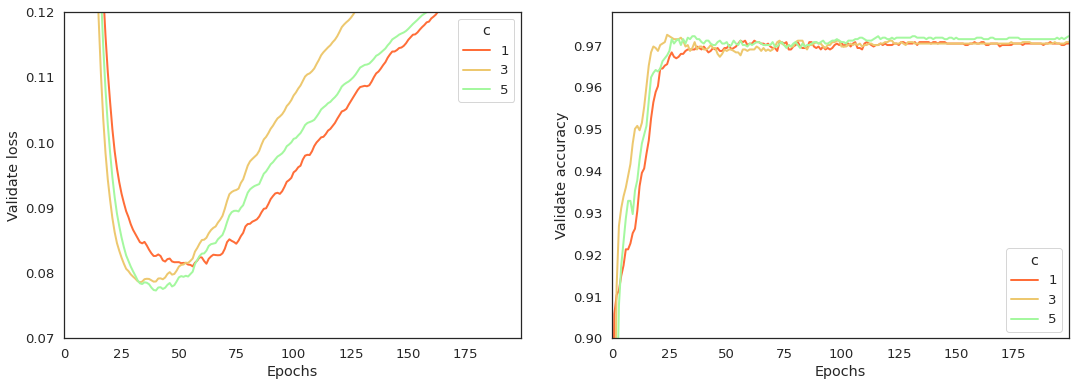

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6), sharex=False, sharey=False, )
ax1, ax2 = axes        



col = 'val_loss'
loss_mean = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).mean(axis=0)).apply(pd.Series).T
loss_std = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).std(axis=0)).apply(pd.Series).T
loss_mean.plot(ax=ax1, lw = 2, color = color,ylim = (0.07, 0.12) ) # ,ylim = (-2.55, -2) 
ax1.set_ylabel('Validate loss')
ax1.set_xlabel('Epochs')




col = 'val_accuracy'
acc_mean = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).mean(axis=0)).apply(pd.Series).T
acc_std = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).std(axis=0)).apply(pd.Series).T
acc_mean.plot(ax=ax2, lw = 2, color = color, ylim = (0.9, 0.978))
ax2.set_ylabel('Validate accuracy')
ax2.set_xlabel('Epochs')

plt.savefig('5FCV_valid.png', bbox_inches='tight', dpi=300)